In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib inline
plt.rc("figure", figsize=(12,9))

# Loi discréte "surmesure"

In [33]:
from scipy import stats

In [34]:
d = 10
etats = np.arange(d)
probas = np.random.rand(d)
loi = stats.rv_discrete(values=(etats, probas/np.sum(probas)))

In [39]:
loi.rvs(size=(20))

array([4, 4, 8, 4, 3, 9, 5, 8, 6, 1, 4, 1, 4, 5, 7, 6, 3, 8, 0, 9])

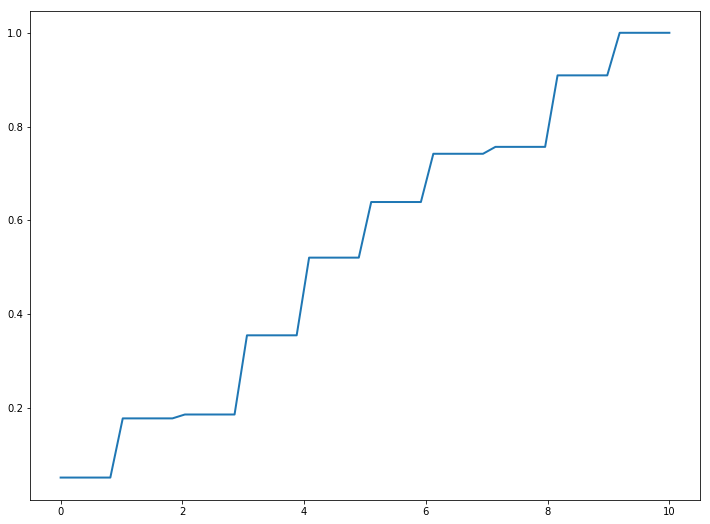

In [42]:
x = np.linspace(0, d, 50)
y = loi.cdf(x)
plt.plot(x, y, lw=2)

In [46]:
print("moyenne : ", loi.mean())
print("variance : ", loi.var())
print("médiane : ", loi.median())
print("moment d'ordre 3 : ", loi.moment(3))

moyenne :  4.6641660298
variance :  7.08913464275
médiane :  4.0
moment d'ordre 3 :  201.780449279


# Marche aléatoire

## Génération 

In [4]:
X, Y = np.random.rand(2, 20000)
x, y = np.cumsum(2*X-1), np.cumsum(2*Y-1)

## Affichage

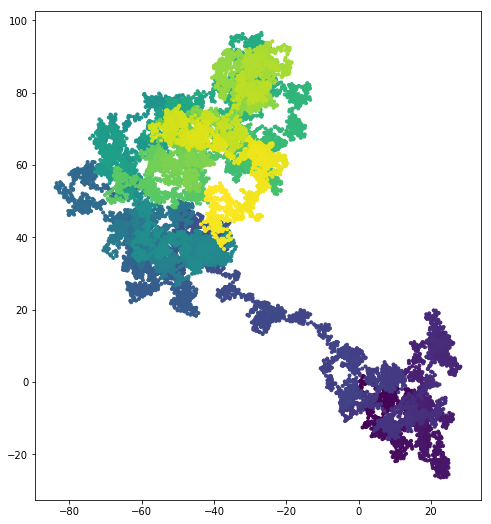

In [5]:
plt.scatter(x, y, c=range(len(x)), marker=".")
plt.gca().set_aspect("equal")

# Chaine de Markov finie

## Création matrice stochastique

In [13]:
def stoch(d):
    P = np.random.rand(d, d)
    s = np.reshape(np.sum(P, axis=1), newshape=(d, 1))
    return P/s

In [16]:
stoch(5)

array([[ 0.29703362,  0.21382315,  0.31723708,  0.07715333,  0.09475282],
       [ 0.23498901,  0.2353619 ,  0.22367174,  0.12199574,  0.1839816 ],
       [ 0.07613575,  0.11566407,  0.17158548,  0.2461729 ,  0.3904418 ],
       [ 0.02948336,  0.00209254,  0.31438682,  0.32047678,  0.3335605 ],
       [ 0.10375192,  0.2160827 ,  0.216821  ,  0.26337164,  0.19997275]])

In [17]:
Q = np.cumsum(P, axis=1)
Q

array([[ 0.20651995,  0.52639021,  0.61036441,  0.77165884,  1.        ],
       [ 0.22459637,  0.51899575,  0.77810919,  0.82938694,  1.        ],
       [ 0.19920599,  0.46522544,  0.5612783 ,  0.87006274,  1.        ],
       [ 0.33421078,  0.56655004,  0.62149947,  0.80600867,  1.        ],
       [ 0.16199977,  0.31706634,  0.47759053,  0.72756636,  1.        ]])

In [29]:
def mc(i0, n, P):
    """
    i0 : état de départ
    n  : longeur de simulation
    P  : matrice de transition
    """
    Q = np.cumsum(P, axis=1)
    def saut(i, t):
        return np.sum((Q[i,:] < t))
    etats = i0*np.ones(shape=(n), dtype=int)
    variable = np.random.rand(n-1)
    for k in range(n-1):
        etats[k+1] = saut(etats[k], variable[k])
    return etats

## Visualisation des fréquences sur la trajectoire

In [30]:
def aff(nbs, etatmax=15):
    P = stoch(etatmax)
    depart = np.random.randint(0, etatmax)
    wd = 0.8/len(nbs)
    for i, nb in enumerate(nbs):
        val, freq = np.unique(mc(depart, nb, P), return_counts=True)
        plt.bar(val + i*wd, freq/nb, width=wd, label="{}".format(nb))
    plt.legend(loc="best")


CPU times: user 1.04 s, sys: 4 ms, total: 1.04 s
Wall time: 1.05 s


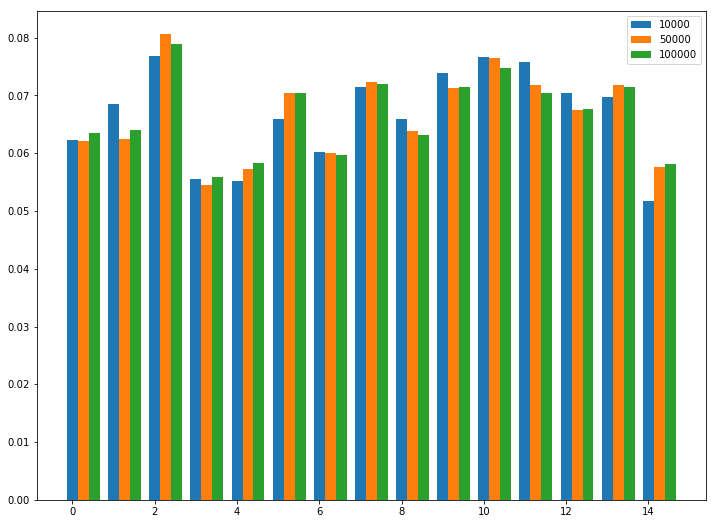

In [31]:
%%time
aff([10_000, 50_000, 100_000])

CPU times: user 1.9 s, sys: 4 ms, total: 1.91 s
Wall time: 1.9 s


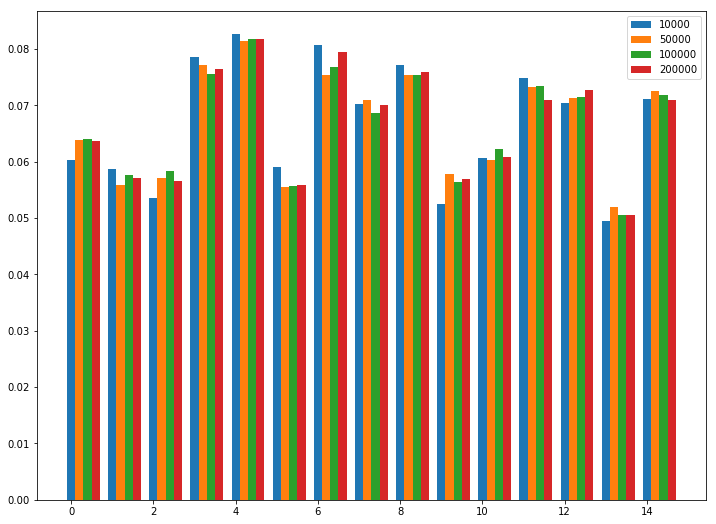

In [32]:
%%time
aff([10_000, 50_000, 100_000, 200_000])